In [2]:
# import libraries
import ftfy
import nltk
import json
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import csv
import numpy as np
import nltk
import seaborn as sb
import warnings

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Binarizer


from collections import Counter
from os import listdir, makedirs
from os.path import isfile, join, splitext, split

from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
#nltk.download('stopwords')


from wordcloud import STOPWORDS, WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier 
# need to import xboost calssifer

In [3]:
df=pd.read_csv('data/task_3a_sample_data.csv')
df.head()

,public_id,title,text,our rating
0,f2182a54,HUGE! Attorney Sidney Powell CONFIRMS Alleged ...,Last week Rep. Louie Gohmert told Chris Salced...,FALSE
1,c5175d8d,Paul Ryan’s Worst Ally - The New York Times,WHATEVER drama plays out when Republicans meet...,TRUE
2,213a870b,"You Can Get Jail Time Or $3,000 Fine For Not W...",Source page URL Title You Can Get Jail Time O...,FALSE
3,392886ea,Antifa gearing up for false flag violence disg...,With merchants in Democrat-run cities boarding...,FALSE
4,bc6d5d55,Remarks by President Biden on the Administrati...,State Dining Room 4:22 P.M. EST THE PRESIDEN...,partially false


In [4]:
bi_class=df.drop([ "title","public_id"], axis = 1)
bi_class.head()

,text,our rating
0,Last week Rep. Louie Gohmert told Chris Salced...,FALSE
1,WHATEVER drama plays out when Republicans meet...,TRUE
2,Source page URL Title You Can Get Jail Time O...,FALSE
3,With merchants in Democrat-run cities boarding...,FALSE
4,State Dining Room 4:22 P.M. EST THE PRESIDEN...,partially false


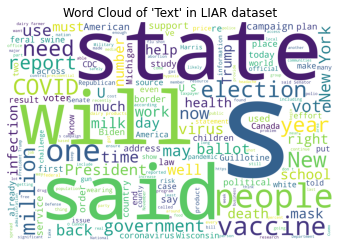

In [5]:
np.random.seed(0) # setting seed to get similar results over multiple experiments.

# word cloud for all the statements in the entire dataset
text = bi_class['text'].values
wordcloud = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of 'Text' in LIAR dataset")
plt.show()

In [6]:
# creating two dataset consisting of True and Fake statements seperately
np.random.seed(0)
true_statements_dataset = bi_class[bi_class['our rating'].astype(str) == 'TRUE']
fake_statements_dataset = bi_class[bi_class['our rating'].astype(str) == 'FALSE']
partially_false_statements_dataset = bi_class[bi_class['our rating'].astype(str) == 'partially false']

In [7]:
np.random.seed(0)
# contains only TRUE statements
true_statements_dataset.head(5)

,text,our rating
1,WHATEVER drama plays out when Republicans meet...,TRUE
13,"“America will never be a socialist country,” P...",TRUE
17,U.S. Senator Tammy Baldwin Stands Up for Wisco...,TRUE
27,ALBANY – Gubernatorial candidate Cynthia Nixon...,TRUE
32,One cannot transfuse democracy at the tip of a...,TRUE


In [8]:

# contains only FAKE statements
np.random.seed(0)
fake_statements_dataset.head(5)

,text,our rating
0,Last week Rep. Louie Gohmert told Chris Salced...,FALSE
2,Source page URL Title You Can Get Jail Time O...,FALSE
3,With merchants in Democrat-run cities boarding...,FALSE
5,Keep up to date with our latest: Have an impo...,FALSE
6,(Natural News) A 2012 study published in the j...,FALSE


In [9]:

# contains only FAKE statements
np.random.seed(0)
partially_false_statements_dataset.head(5)

,text,our rating
4,State Dining Room 4:22 P.M. EST THE PRESIDEN...,partially false
9,Gov. Scott Walker said Friday his presidential...,partially false
10,Please Share This Story! Dr. ...,partially false
14,(WISCONSIN) — Trump’s failed COVID-19 response...,partially false
16,Vaccine manufacturer Merck has abandoned devel...,partially false


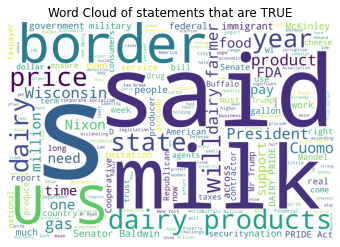

In [10]:
np.random.seed(0)
# creating word cloud for only those statements that are TRUE
text_true = true_statements_dataset['text'].values
wordcloud_true = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text_true))
plt.imshow(wordcloud_true)
plt.axis('off')
plt.title("Word Cloud of statements that are TRUE")
plt.show()

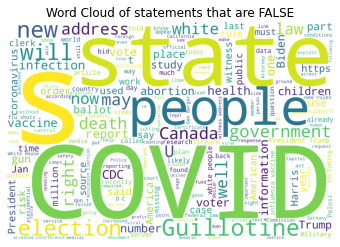

In [11]:

np.random.seed(0)
# creating word cloud for or only those statements that are FAKE
text_false = fake_statements_dataset['text'].values
wordcloud_false = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text_false))
plt.imshow(wordcloud_false)
plt.axis('off')
plt.title("Word Cloud of statements that are FALSE")
plt.show()

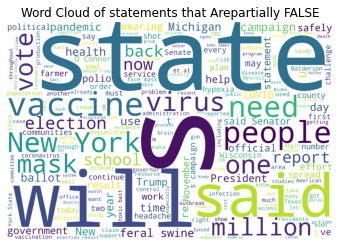

In [12]:

np.random.seed(0)
# creating word cloud for or only those statements that are FAKE
text_partially_false = partially_false_statements_dataset['text'].values
wordcloud_partially_false = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text_partially_false))
plt.imshow(wordcloud_partially_false)
plt.axis('off')
plt.title("Word Cloud of statements that Arepartially FALSE")
plt.show()

In [57]:
data = df.drop(["public_id","title"], axis = 1)

In [58]:
data.reset_index(inplace = True)
data.drop(["index"], axis = 1, inplace = True)

In [59]:
data['text'] = data['text'].apply(lambda x: x.lower())

In [60]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

In [61]:
data['text'] = data['text'].apply(punctuation_removal)

In [62]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smsoh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


our rating
FALSE              20
TRUE               10
partially false    20
Name: text, dtype: int64


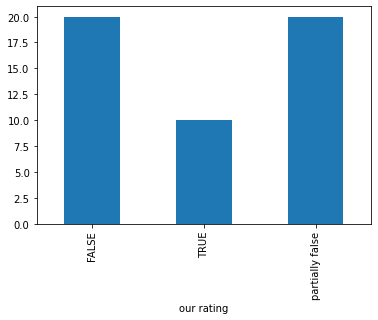

In [65]:
print(data.groupby(['our rating'])['text'].count())
data.groupby(['our rating'])['text'].count().plot(kind='bar')
plt.show()

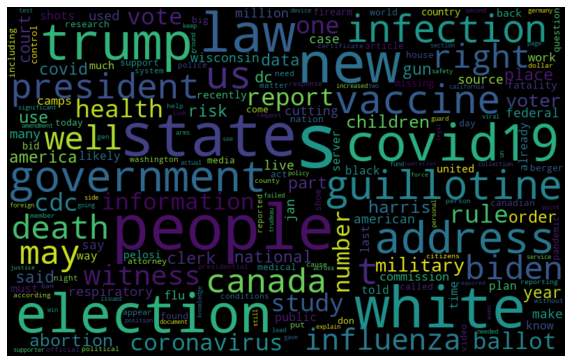

In [66]:
from wordcloud import WordCloud
fake_data = data[data['our rating'] == "FALSE"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

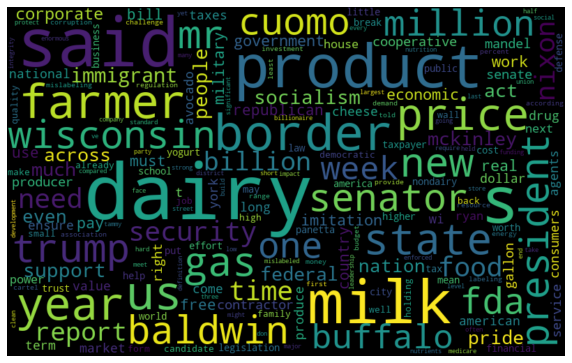

In [67]:
from wordcloud import WordCloud
fake_data = data[data['our rating'] == "TRUE"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [68]:
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

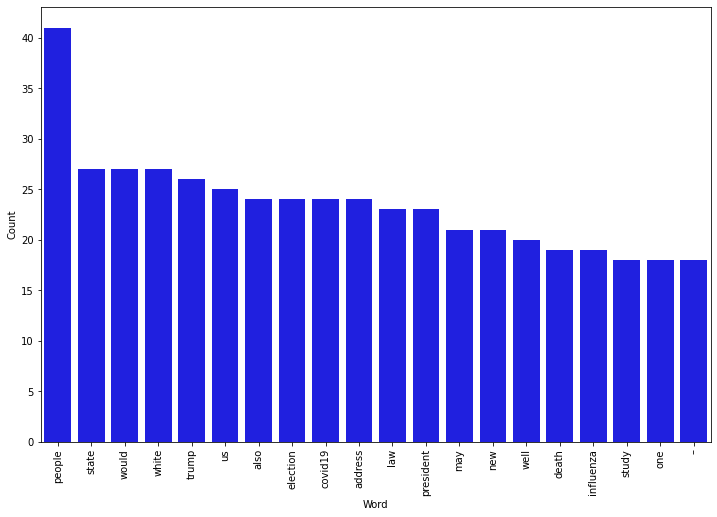

In [71]:
counter(data[data['our rating'] == 'FALSE'], 'text', 20)

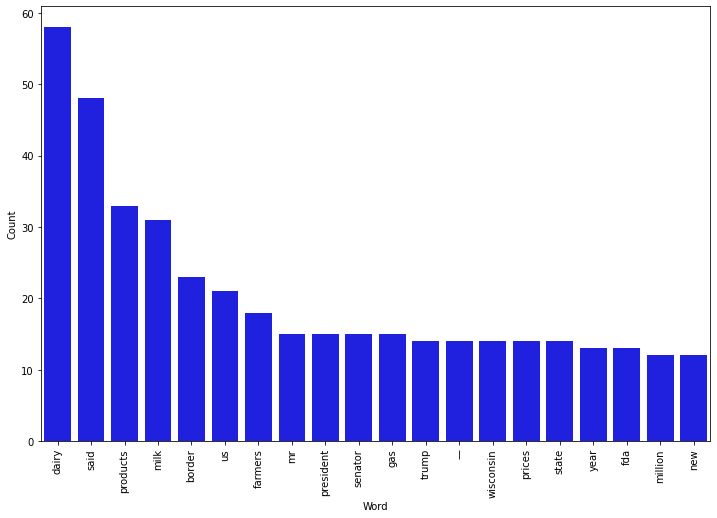

In [72]:
counter(data[data['our rating'] == 'TRUE'], 'text', 20)

 TF-IDF

In [76]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [77]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data['our rating'], test_size=0.2, random_state=42)

##Logistic regression

In [78]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 10.0%


Confusion matrix, without normalization


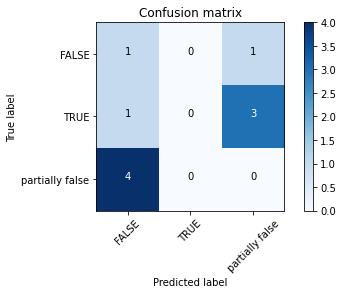

In [79]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['FALSE', 'TRUE','partially false'])

##Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 20.0%


Confusion matrix, without normalization


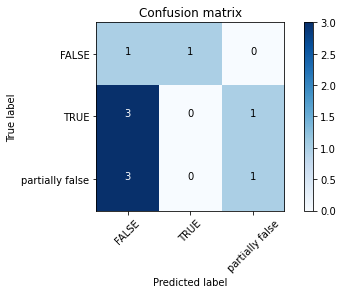

In [81]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['FALSE', 'TRUE','partially false'])

##Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 20.0%


Confusion matrix, without normalization


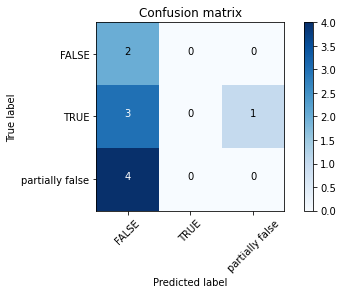

In [83]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['FALSE', 'TRUE','partially false'])